<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px;width: 180px"><img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo"></td>
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Data Science</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>WS 2022</b></font></div>
        </td>
    </tr>
</table>

---

# 4 Multiple Linear Regression

In this session, we revist the penguin data set from last week. We still know, that there are no outliers, but some missing values. So we start by removing observations with missing values.



In [92]:
import seaborn as sns
import pandas as pd

penguins = sns.load_dataset("penguins")
penguins_cleaned = penguins.dropna()
penguins_cleaned

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


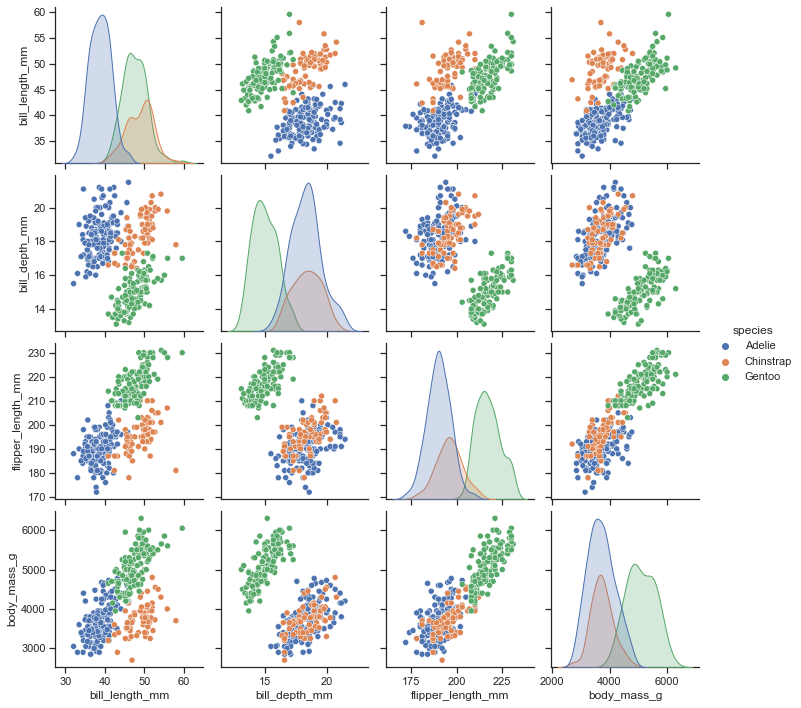

In [93]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(penguins_cleaned, hue="species")

### 4.1 Creating and fitting a Multiple Regression Model

If we would like to create a model, that predicts the **flipper length** not only from **bill length** but also **bill depth**, we need to define a model with multiple predictors.


#### Calculating the Variance Inflation Factor

Looking into the scatter plots above, we see that **bill length** and **depth** are not very colinear.

To prove this assumption, we can calculate the VIF using the ```variance_inflation_factor()``` method from the statsmodels package:


In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Put only the predictors / the independent variables, we want to use in the set
predictors_to_check = penguins_cleaned[['bill_length_mm', 'bill_depth_mm']]

# Add a constant to account for the intercepts
predictors_to_check = add_constant(predictors_to_check)

# Now we have a dataframe, with only the predictors, we want to use and a constant
predictors_to_check

,const,bill_length_mm,bill_depth_mm
0,1.0,39.1,18.7
1,1.0,39.5,17.4
2,1.0,40.3,18.0
4,1.0,36.7,19.3
5,1.0,39.3,20.6
...,...,...,...
338,1.0,47.2,13.7
340,1.0,46.8,14.3
341,1.0,50.4,15.7
342,1.0,45.2,14.8


In [95]:
# This calculates the VIF for each predictor
pd.Series([variance_inflation_factor(predictors_to_check.values, i) 
               for i in range(predictors_to_check.shape[1])], 
              index=predictors_to_check.columns)

const             183.831221
bill_length_mm      1.055152
bill_depth_mm       1.055152
dtype: float64

We see a high $VIF$ of $183.83$ for the intercept (const). However, this is not relevant for the futher proceeding.
bill_length_mm and bill_depth_mm have a low $VIF$ of $1.06$. Note that, the predictors will have the same $VIF$ if we only analyze two of them.

✍️ **Task**

Calculate the VIF when using a data set including **bill_length_mm,bill_depth_mm** and **body_mass_g**

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Put only the predictors / the independent variables, we want to use in the set
predictors_to_check = penguins_cleaned[['bill_length_mm', 'bill_depth_mm','body_mass_g']]

# Add a constant to account for the intercepts
predictors_to_check = add_constant(predictors_to_check)

# This calculates the VIF for each predictor
pd.Series([variance_inflation_factor(predictors_to_check.values, i) 
               for i in range(predictors_to_check.shape[1])], 
              index=predictors_to_check.columns)

const             217.678253
bill_length_mm      1.539927
bill_depth_mm       1.292941
body_mass_g         1.877809
dtype: float64

#### Building and fitting the Model

Using sklearn, we can simply add further predictors by adding additional columns to the data frame.

In [97]:
# Importing scikit-learn package
from sklearn.linear_model import LinearRegression
		
# Defining the predicted variable y and predictor X
X = penguins_cleaned[["bill_length_mm", "bill_depth_mm"]]
y = penguins_cleaned[["flipper_length_mm"]]

# Define, that we want to take a linear regression as a model f
f = LinearRegression()

# Fitting Simple Linear Regression to the test set
f.fit(X, y)

LinearRegression()

In [7]:
X

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6
...,...,...
338,47.2,13.7
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


In [8]:
# The following section will get results by interpreting the created instance: 

# Print the Intercept:
print('intercept (beta_0):', f.intercept_)

# Print the Slope:
print('slope (beta_1 and beta_2):', f.coef_) 

intercept (beta_0): [194.21816164]
slope (beta_1 and beta_2): [[ 1.40891962 -3.21782338]]


✍️ **Task**

What is the verbal interpretation of the interecept and coefficents (slope)

In [9]:
# The slope has now two parameters in the order of columns.
# If we had  a penguin without a bill (would mean both predictors 0), we would expect it to have a flipper length of 194 cm
# the longer the bill, the longer the flipper
# the deeper the bill the shorter the flipper
# This is not very intuitive, but makes sense, if we look in the data.
# There is in deed a negative relation ship between bill depth and flipper length
# However, within the same species we observe a positive correlation 

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## 4.2 Applications of Linear Regression

### Working with Qualitative Variables

As the results of the prior model are somewhat odd. We want to create an new and simple model to explain the flipper length only by using the penguin species.

Therefore, we have to create new (dummy) variables to account for the species. Here, we create two new columns, that only take the value ```True``` for a distinctive species. Note, that we do not need a extra column for the Chinstrap species. Any penguin where both (```isAdelie``` and ```isGentoo```) is ```False``` is a Chinstrap.





In [98]:
penguins_cleaned_new = penguins_cleaned.copy()
penguins_cleaned_new["isAdelie"] = False
penguins_cleaned_new["isGentoo"] = False
penguins_cleaned_new.loc[:,"isAdelie"] = penguins_cleaned["species"]=="Adelie"
penguins_cleaned_new.loc[:,"isGentoo"] = penguins_cleaned["species"]=="Gentoo"

penguins_cleaned = penguins_cleaned_new.copy()
penguins_cleaned


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,isAdelie,isGentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,True,False
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,True,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,True,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,True,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,True,False
...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,False,True
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,False,True
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,False,True
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,False,True


Note, that there is also a integrated pandas function to create [dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

In [99]:
# Importing scikit-learn package
from sklearn.linear_model import LinearRegression
		
# Defining the predicted variable y and predictor X
X = penguins_cleaned[["isAdelie", "isGentoo"]]
y = penguins_cleaned[["flipper_length_mm"]]

# Define, that we want to take a linear regression as a model f
f = LinearRegression()

# Fitting Simple Linear Regression to the test set
f.fit(X, y)

LinearRegression()

In [100]:
# The following section will get results by interpreting the created instance: 

# Print the Intercept:
print('intercept (beta_0):', f.intercept_)

# Print the Slope:
print('slope (beta_1 and beta_2):', f.coef_) 

intercept (beta_0): [195.82352941]
slope (beta_1 and beta_2): [[-5.72078969 21.41176471]]


After fitting the model, we see the intercept and parametersm that provide us with the following model:

$\text{flipper length mm} = 195.8 mm  -5.72 mm \times \text{isAdelie} + 21.4 mm \times \text{isGentoo}$

This means, that we expect a Chinstrap to have a flipper length of 195.8 mm, while the flippers of a Adelie are 5.72 mm shorter and of a isGentoo are 21.4 mm longer.

✍️ **Task**

Compare the coeffients of the model to the mean flipper length of the different penguin species in the data. What do You find?

In [13]:
penguins_cleaned.groupby("species").mean()
# Only using the three categorial variables, we see that the regression model takes exactly the mean values to predict the flipper length

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,isAdelie,isGentoo
species,,,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384,True,False
Chinstrap,48.833824,18.420588,195.823529,3733.088235,False,False
Gentoo,47.568067,14.996639,217.235294,5092.436975,False,True


#### Working with statmodels formula API

Note, that in contrast to sklearn, statsmodels can directly work with categorical data. Instread of passing a datafame with the predictors (```X```), we can pass the whole data frame an define the form of the regression model with a special formula (based on the notation in the programming language R).

```'flipper_length_mm ~ C(species) + 1'```
Indicates, that we model should explain ```flipper_length_mm``` based on the categories in the column ```species``` and an intercept.

In [14]:
import statsmodels.formula.api as smf

model = smf.ols('flipper_length_mm ~ C(species) + 1', data = penguins_cleaned)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      flipper_length_mm   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     567.4
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.59e-107
Time:                        10:02:40   Log-Likelihood:                -1103.0
No. Observations:                 333   AIC:                             2212.
Df Residuals:                     330   BIC:                             2223.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

We, can also force statmodels to omit the intercept (```-1```) and directly get the group means as coefficients:

In [15]:
import statsmodels.formula.api as smf

model = smf.ols('flipper_length_mm ~ C(species) -1', data = penguins_cleaned)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      flipper_length_mm   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     567.4
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.59e-107
Time:                        10:02:40   Log-Likelihood:                -1103.0
No. Observations:                 333   AIC:                             2212.
Df Residuals:                     330   BIC:                             2223.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
C(species)[Adelie]      190.10

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

### Comparing Models

Next, we repoduce the counter intuitive model, that explains the `flipper_length_mm` based on `bill_length_mm` and `bill_depth_mm`.

<AxesSubplot:xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

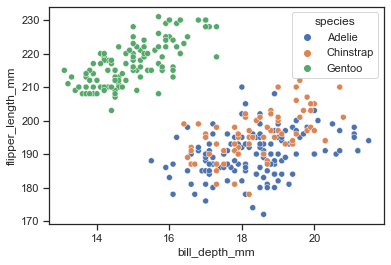

In [16]:
sns.scatterplot(data = penguins_cleaned, y = "flipper_length_mm", x = "bill_depth_mm", hue="species")

We see, that a negative slope for  bill depth would fit the data, if we do not consinder the species. This is what happes, with the following simple model:

In [17]:
import statsmodels.formula.api as smf

model = smf.ols('flipper_length_mm ~  bill_length_mm + bill_depth_mm  + 1', data = penguins_cleaned)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      flipper_length_mm   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     269.5
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           4.14e-70
Time:                        10:02:41   Log-Likelihood:                -1190.0
No. Observations:                 333   AIC:                             2386.
Df Residuals:                     330   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        194.2182      6.437     30.

In contrast, if we consider the species as a categorical variable, we get a stronger model, that explains $R^2=84.5 \%$ instead of $R^2=62.0\%$ of the variance in the data.

In [18]:
import statsmodels.formula.api as smf

model = smf.ols('flipper_length_mm ~  bill_length_mm + bill_depth_mm + C(species)  + 1', data = penguins_cleaned)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      flipper_length_mm   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.44e-131
Time:                        10:02:42   Log-Likelihood:                -1040.3
No. Observations:                 333   AIC:                             2091.
Df Residuals:                     328   BIC:                             2110.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

### 🤓 Using SciKitLearn

While `statsmodels` is very convenient for statistical analysis. We use `sklearn`, as we can reuse the concepts working with more complex machine learning models in the future.

We rebuild our more complex model with `sklearn`:

In [19]:
# Importing scikit-learn package
from sklearn.linear_model import LinearRegression
		
# Defining the predicted variable y and predictor X
X = penguins_cleaned[["bill_length_mm","bill_depth_mm","isAdelie", "isGentoo"]]
y = penguins_cleaned[["flipper_length_mm"]]

# Define, that we want to take a linear regression as a model f
f = LinearRegression()

# Fitting Simple Linear Regression to the test set
f.fit(X, y)


LinearRegression()

#### Creating a prediction

To get further insights into the data, we make a in sample prediction on the data we have. Therefore, we pass the dataframe with the predictors to the ```predict()``` function and store the results in the original data frame:

In [20]:
penguins_cleaned["Predicted_flipper_length_mm"] = f.predict(X)
penguins_cleaned


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,isAdelie,isGentoo,Predicted_flipper_length_mm
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,True,False,190.978782
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,True,False,188.755205
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,True,False,190.479680
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,True,False,190.434077
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,True,False,194.785009
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,False,True,214.473550
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,False,True,215.347083
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,False,True,220.599997
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,False,True,215.176810


Now, we can calculate the residuals, by substracting the prediction from our actual observation:

In [21]:
penguins_cleaned.loc[:,"Residuals"] = penguins_cleaned["flipper_length_mm"] - penguins_cleaned["Predicted_flipper_length_mm"]

In [22]:
# Note that the residuals are the basis for calculating the Mean Squared Error / Mean Squared Residuals
penguins_cleaned.loc[:,"SquaredError"] = (penguins_cleaned["Residuals"])**2

penguins_cleaned.loc[:,"SquaredError"].mean()

30.271608833554698

✍️ **Taks**

Create a [histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) of the residuals.

<AxesSubplot:xlabel='Residuals', ylabel='Count'>

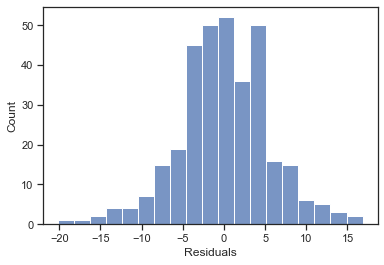

In [23]:
sns.histplot(data=penguins_cleaned, x="Residuals")

The residuals follow a normal distribuation (bell curve), which is usually what we want. This means that most residuals are close to zero and there are only a few outliers, which are symmetrical. Hence, it is unlikely that we have an systematic bias in the data or the model.

#### Creating a Residual Plot

For a more detailes analysis it can help to create a scatterplot of the residuals over the predictors.
Here, we can observe that the residuals are mostly independet from the bill_length (i.e., the mean an variance of the residuals seems to be the same for alle bull lengths)

<AxesSubplot:xlabel='bill_length_mm', ylabel='Residuals'>

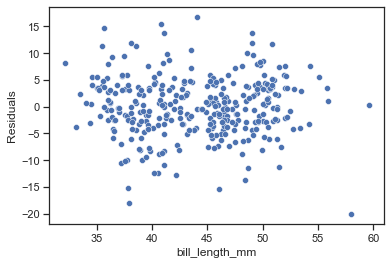

In [24]:
sns.scatterplot(data=penguins_cleaned, y="Residuals",x ="bill_length_mm")

The ```jointplot()``` is the [combination](https://seaborn.pydata.org/generated/seaborn.jointplot.html) of a scatter plot and a histogram

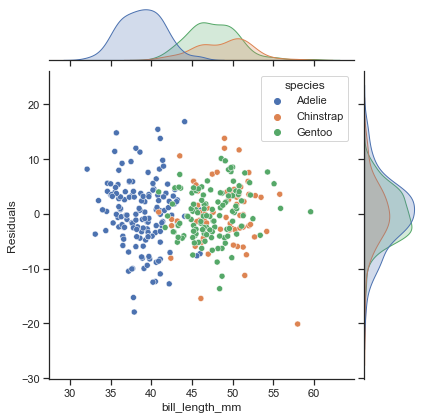

In [25]:
sns.jointplot(data=penguins_cleaned,  y="Residuals",x ="bill_length_mm", hue="species")

✍️ **Task**

Create jointplot for the other two predictors bill_depth_mm and species:

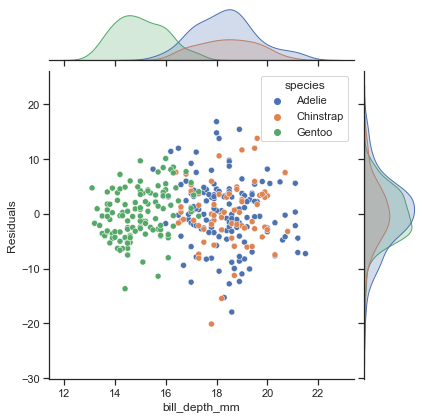

In [26]:
sns.jointplot(data=penguins_cleaned, y="Residuals",x ="bill_depth_mm", hue = "species")

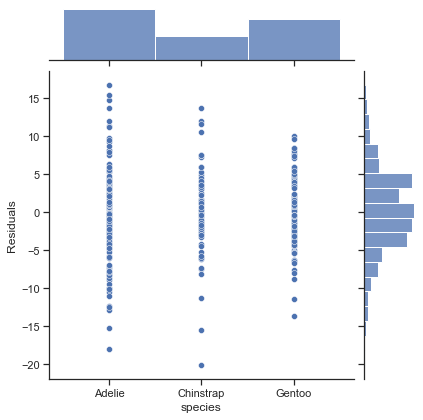

In [27]:
sns.jointplot(data=penguins_cleaned, y="Residuals",x ="species")

With categorical data, the scatterplot is hard to interpret, as all the observations of one category line up perfectly.

✍️ **Task**

Create a [```boxplot()```](https://seaborn.pydata.org/generated/seaborn.boxplot.html) and a [```violinplot()```](https://seaborn.pydata.org/generated/seaborn.violinplot.html) for the species data

<AxesSubplot:xlabel='species', ylabel='Residuals'>

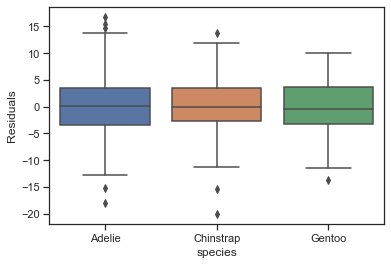

In [28]:
sns.boxplot(data=penguins_cleaned, y="Residuals",x ="species")

<AxesSubplot:xlabel='species', ylabel='Residuals'>

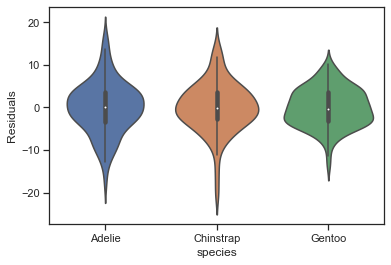

In [29]:
sns.violinplot(data=penguins_cleaned, y="Residuals",x ="species")

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

#### Residual Plots of Bad Models

So far, we did not find anything special about the residuals. They appear very random and independ from the predictors. Next, we change this by creating a very bad model.

In [30]:
# Importing scikit-learn package
from sklearn.linear_model import LinearRegression
		
# Defining the predicted variable y and predictor X
X = penguins_cleaned[["bill_length_mm","bill_depth_mm"]]
y = penguins_cleaned[["flipper_length_mm"]]

# Define, that we want to take a linear regression as a model f
f = LinearRegression()

# Fitting Simple Linear Regression to the test set
f.fit(X, y)

penguins_cleaned["Predicted_flipper_length_mm"] = f.predict(X)
penguins_cleaned

penguins_cleaned["Residuals"] = penguins_cleaned["flipper_length_mm"] - penguins_cleaned["Predicted_flipper_length_mm"]

<AxesSubplot:xlabel='Residuals', ylabel='Count'>

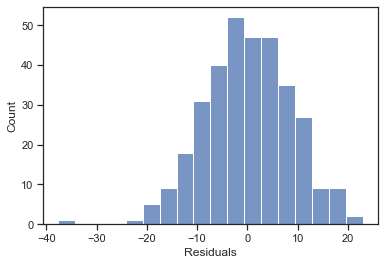

In [31]:
sns.histplot(data=penguins_cleaned, x="Residuals")

In [32]:
# We observe, that the in-sample MSE is twice as large as with the model we used before
# Also it is far less symmetrical and has outliers to the left
penguins_cleaned["SquaredError"] = (penguins_cleaned["Residuals"])**2

penguins_cleaned["SquaredError"].mean()

74.37425599612511

✍️ **Task**

Create plots to analyze how the residuals behave towards `bill_length_mm`, `bill_depth_mm` and `species`.

What do You observe for each graph?

In [33]:
penguins_cleaned["SquaredError"] = (penguins_cleaned["Residuals"])**2

penguins_cleaned["SquaredError"].mean()

74.37425599612511

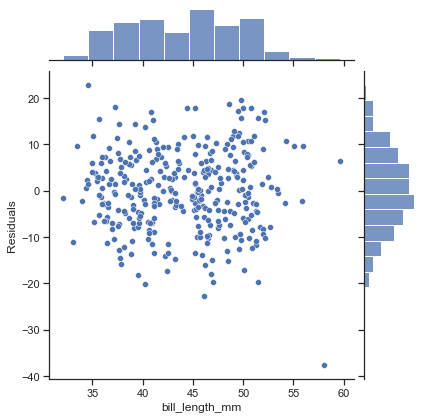

In [34]:
sns.jointplot(data=penguins_cleaned,  y="Residuals",x ="bill_length_mm")

# The residuals seem to be pretty random. There is no clear pattern.

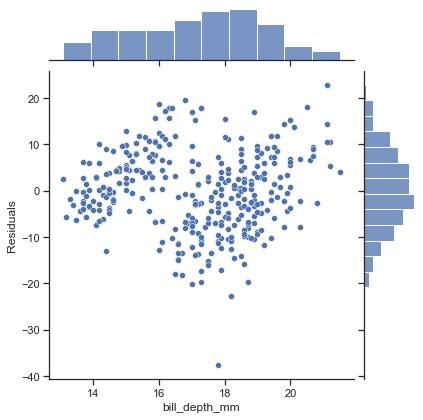

In [35]:
sns.jointplot(data=penguins_cleaned,  y="Residuals",x ="bill_depth_mm")

# For small bill depth the residuals are all pretty close to zero
# For the middle bill depth, the residuals on average are smaller than zero and have a high variance
# With larger bill depth, the average residual is larger than zero
# The model seems to make a systematic error 

<AxesSubplot:xlabel='species', ylabel='Residuals'>

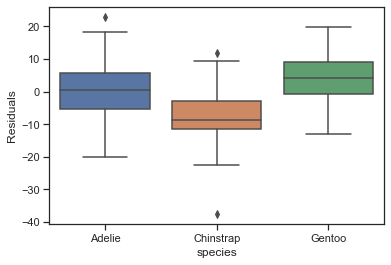

In [36]:
sns.boxplot(data=penguins_cleaned, y="Residuals",x ="species")

# Here the systematic error of the mode becomes even more obvious
# The model make very good predictions for Adelie penguines
# For Chinstrap, we have negative residuals, which means we systematically overestimate the flipper length
## See penguins_cleaned["Residuals"] = penguins_cleaned["flipper_length_mm"] - penguins_cleaned["Predicted_flipper_length_mm"]
# For Gentoo we systematically under estimate the flipper length
# The model seems to have a systematic bias, which indiactes that the model is not complex / flexible enough to fit the data
# One way to improve the model is to intergrate the species as an categorical variable, as we did before

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## 🏆 4.3 Case Study

Imagine researching penguin in Antarctica caused Your scale to freeze an break. However, You still want to get an estimate of the penguins' weight.

Luckily, Your colleagues left You with a data set (```train```) with all the other variables you can measure. Your task ist to build and train a regression model that predicts the penguins' weight based on the other variables.

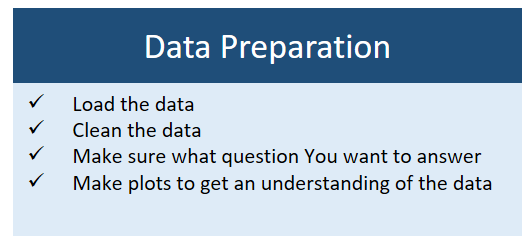

Stop for a moment, before You dive into Your first data science project.

- Do you have a supervised or unsupervised problem?
- What are the predicted variable and the predictors?
- Will you use a parametric or non-prarametric model? Why?
- What is the criteria that Your model was a sucess?


Create a multiple linear regression model to predict the penguins' weight. Compare the Mean Squared Error of the model in the ```test``` set with your colleagues.


#### Data Preparation

First, we need a clean data set. We remove all observations with missing values.

In [69]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

penguins = sns.load_dataset("penguins")
penguins_cleaned = penguins.dropna()
penguins_cleaned



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Next, we create some plots to see that might be good predictors for each penguines body mass:

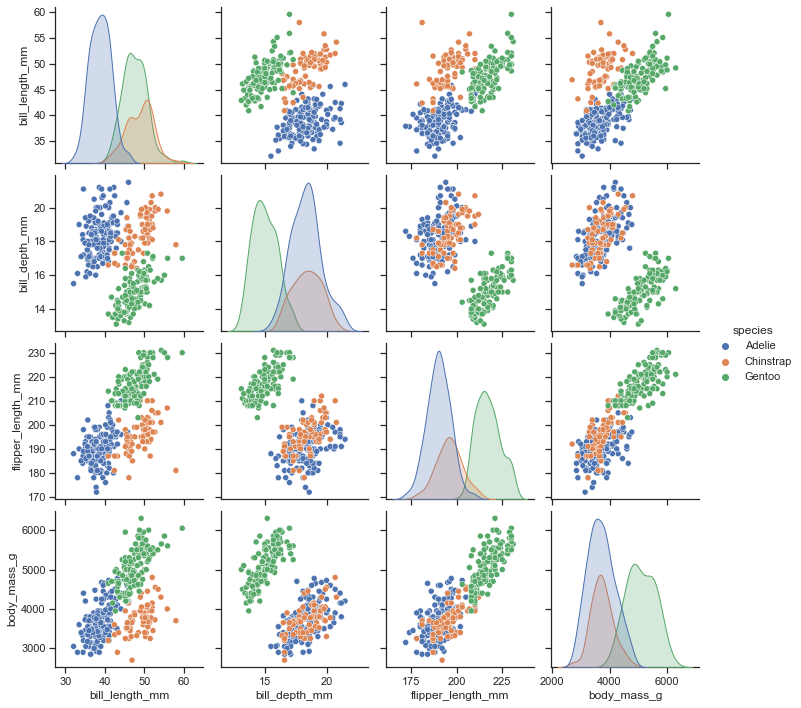

In [70]:
sns.pairplot(penguins_cleaned, hue="species")

We see that different penguin species have different weights and that the flipper length might be a good predictor for the body mass.

Next, we look into the relationship of the not-numeric variables with the body mass:

<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

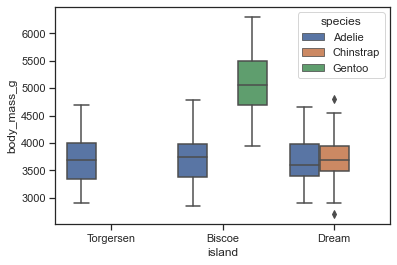

In [71]:
sns.boxplot(x="island", y="body_mass_g",
            hue="species", data=penguins_cleaned)

<AxesSubplot:xlabel='sex', ylabel='body_mass_g'>

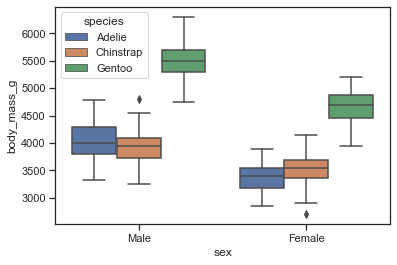

In [72]:
sns.boxplot(x="sex", y="body_mass_g",
            hue="species", data=penguins_cleaned)

#### Feature Engineering

We want to build a model, that predicts body mass based on all the other variables.

$\text{body mass g} = f(\text{species, island, bill length mm, bill depth mm, flipper length mm, sex})$

To use the nominal and ordinal variables in a linear regression model, we have to apply some changes.

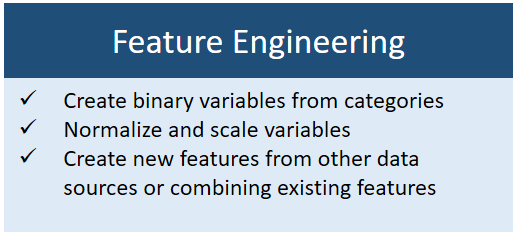

We saw that that there is relevant information about the body mass in the categorical variables. Hence, we next create binary dummy variables from the nominal variables, so we can use them a predictors in the linear regression model.

##### ✍️ Create the categorical variables

Create new Boolean variables (isAdelie, isGentoo, fromTorgersen, fromBiscoe, isFemale) to indicate the qualitative data. Use the code, we used above or try out the in-built pandas [function](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

In [101]:
penguins_cleaned["isAdelie"] = False
penguins_cleaned["isGentoo"] = False
penguins_cleaned.loc[:,"isAdelie"] = penguins_cleaned["species"]=="Adelie"
penguins_cleaned.loc[:,"isGentoo"] = penguins_cleaned["species"]=="Gentoo"
penguins_cleaned["island"].unique()

penguins_cleaned["fromTorgersen"] = False
penguins_cleaned["fromBiscoe"] = False
penguins_cleaned.loc[:,"fromTorgersen"] = penguins_cleaned["island"]=="Torgersen"
penguins_cleaned.loc[:,"fromBiscoe"] = penguins_cleaned["island"]=="Biscoe"

penguins_cleaned["isFemale"] = penguins_cleaned["sex"]=="Female"
penguins_cleaned

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,isAdelie,isGentoo,fromTorgersen,fromBiscoe,isFemale
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,True,False,True,False,False
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,True,False,True,False,True
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,True,False,True,False,True
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,True,False,True,False,True
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,False,True,False,True,True
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,False,True,False,True,True
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,False,True,False,True,False
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,False,True,False,True,True


In [75]:
# Alternative Approach
pd.get_dummies(penguins_cleaned)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,isAdelie,isGentoo,fromTorgersen,fromBiscoe,isFemale,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,True,False,True,False,False,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,True,False,True,False,True,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,True,False,True,False,True,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,True,False,True,False,True,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,True,False,True,False,False,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,True,False,True,True,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,False,True,False,True,True,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,False,True,False,True,False,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,False,True,False,True,True,0,0,1,1,0,0,1,0


#### Model Development
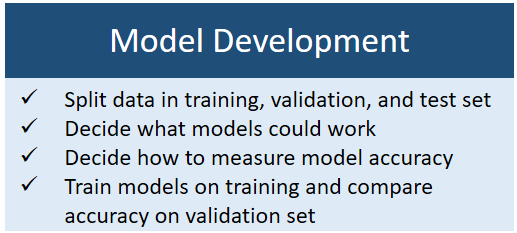

Next, we split the date into a training and test set. We than define a linear model and select the predictors and plan to measure the models performance based on the $MSE$.

##### Here the data is split

into a training and a test set.

In [102]:
train, test = train_test_split(penguins_cleaned, test_size=0.2, random_state=11)

In [77]:
train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,isAdelie,isGentoo,fromTorgersen,fromBiscoe,isFemale
306,Gentoo,Biscoe,43.4,14.4,218.0,4600.0,Female,False,True,False,True,True
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male,True,False,True,False,False
88,Adelie,Dream,38.3,19.2,189.0,3950.0,Male,True,False,False,False,False
76,Adelie,Torgersen,40.9,16.8,191.0,3700.0,Female,True,False,True,False,True
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
167,Chinstrap,Dream,50.5,19.6,201.0,4050.0,Male,False,False,False,False,False
276,Gentoo,Biscoe,43.8,13.9,208.0,4300.0,Female,False,True,False,True,True
97,Adelie,Dream,40.3,18.5,196.0,4350.0,Male,True,False,False,False,False
86,Adelie,Dream,36.3,19.5,190.0,3800.0,Male,True,False,False,False,False


In [78]:
test

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,isAdelie,isGentoo,fromTorgersen,fromBiscoe,isFemale
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,Male,False,False,False,False,False
272,Gentoo,Biscoe,45.1,14.4,210.0,4400.0,Female,False,True,False,True,True
108,Adelie,Biscoe,38.1,17.0,181.0,3175.0,Female,True,False,False,True,True
165,Chinstrap,Dream,52.0,18.1,201.0,4050.0,Male,False,False,False,False,False
240,Gentoo,Biscoe,50.2,14.3,218.0,5700.0,Male,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
46,Adelie,Dream,41.1,19.0,182.0,3425.0,Male,True,False,False,False,False
190,Chinstrap,Dream,46.9,16.6,192.0,2700.0,Female,False,False,False,False,True
287,Gentoo,Biscoe,49.5,16.2,229.0,5800.0,Male,False,True,False,True,False
294,Gentoo,Biscoe,46.4,15.0,216.0,4700.0,Female,False,True,False,True,True


##### ✍️ Training the model

Use sklearn to train a linear model on the the training data set. Use `y` to store the predicted variable and `X` to store the predictors. 

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

##### Training the model

on the training data set

In [79]:
# Importing scikit-learn package
from sklearn.linear_model import LinearRegression
		
# Defining the predicted variable y and predictor X
X = train[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'isAdelie',	'fromTorgersen',	'fromBiscoe',	'isFemale']]
y = train[["body_mass_g"]]

# Define, that we want to take a linear regression as a model f
f = LinearRegression()

# Fitting Simple Linear Regression to the test set
f.fit(X, y)



LinearRegression()

##### ✍️ Prediction and Evaluation on the Training Set

Next, make a prediction on the training data set and add two new columns to the `train` DataFrame. The `Predicted_body_mass_g` the `Residuals` (the prediction error).

**Hint**:
- If you are not sure how to do this look below in the chapter *Evaluation on the Test Set* 

In [80]:
train["Predicted_body_mass_g"] = f.predict(X)
train


<ipython-input-80-86cd792a16b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Predicted_body_mass_g"] = f.predict(X)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,isAdelie,isGentoo,fromTorgersen,fromBiscoe,isFemale,Predicted_body_mass_g
306,Gentoo,Biscoe,43.4,14.4,218.0,4600.0,Female,False,True,False,True,True,4815.369507
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male,True,False,True,False,False,3796.570099
88,Adelie,Dream,38.3,19.2,189.0,3950.0,Male,True,False,False,False,False,3789.379613
76,Adelie,Torgersen,40.9,16.8,191.0,3700.0,Female,True,False,True,False,True,3510.106627
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,True,False,True,False,True,3586.619633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Chinstrap,Dream,50.5,19.6,201.0,4050.0,Male,False,False,False,False,False,4240.354017
276,Gentoo,Biscoe,43.8,13.9,208.0,4300.0,Female,False,True,False,True,True,4511.238862
97,Adelie,Dream,40.3,18.5,196.0,4350.0,Male,True,False,False,False,False,4059.691196
86,Adelie,Dream,36.3,19.5,190.0,3800.0,Male,True,False,False,False,False,3798.307508


In [81]:
train["Residuals"] = train["body_mass_g"] - train["Predicted_body_mass_g"]
train

<ipython-input-81-d8a22ca2f5bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Residuals"] = train["body_mass_g"] - train["Predicted_body_mass_g"]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,isAdelie,isGentoo,fromTorgersen,fromBiscoe,isFemale,Predicted_body_mass_g,Residuals
306,Gentoo,Biscoe,43.4,14.4,218.0,4600.0,Female,False,True,False,True,True,4815.369507,-215.369507
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male,True,False,True,False,False,3796.570099,3.429901
88,Adelie,Dream,38.3,19.2,189.0,3950.0,Male,True,False,False,False,False,3789.379613,160.620387
76,Adelie,Torgersen,40.9,16.8,191.0,3700.0,Female,True,False,True,False,True,3510.106627,189.893373
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,True,False,True,False,True,3586.619633,-336.619633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Chinstrap,Dream,50.5,19.6,201.0,4050.0,Male,False,False,False,False,False,4240.354017,-190.354017
276,Gentoo,Biscoe,43.8,13.9,208.0,4300.0,Female,False,True,False,True,True,4511.238862,-211.238862
97,Adelie,Dream,40.3,18.5,196.0,4350.0,Male,True,False,False,False,False,4059.691196,290.308804
86,Adelie,Dream,36.3,19.5,190.0,3800.0,Male,True,False,False,False,False,3798.307508,1.692492


##### ✍️ Check the residuals

Create a histogram for the residuals and a box plot of the residuals grouped for the species.

<AxesSubplot:xlabel='Residuals', ylabel='Count'>

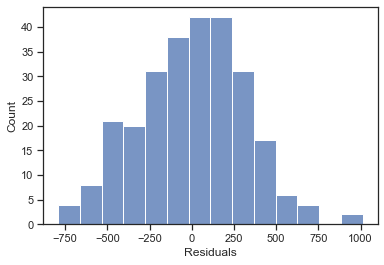

In [82]:
# The residuals look, like they are normally distributed.
sns.histplot(data=train, x="Residuals")

<AxesSubplot:xlabel='species', ylabel='Residuals'>

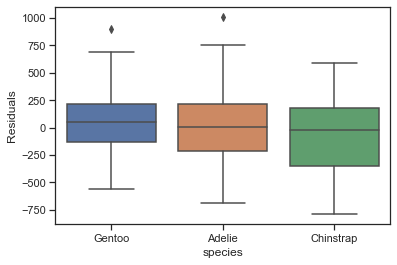

In [83]:
sns.boxplot(data=train, y="Residuals",x ="species")
# We make no a systematic error for the species (boxes overlap)

##### ✍️  Calculate the MSE

Use the columns `Predicted_body_mass_g` and `body_mass_g` to calculate the mean squared error on the training data set. See [notebook 3](https://colab.research.google.com/drive/1zDwDjDThJNZyXL_Acj4lT8BoSccWIKLr?usp=sharing)




In [85]:
# On average we miss the weight by 314g in the training set.

import numpy as np

train["SquaredError"] = (train["Residuals"])**2

train["SquaredError"].mean()

# our average training error in g
np.sqrt(train["SquaredError"].mean())

<ipython-input-85-873bba17c63e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["SquaredError"] = (train["Residuals"])**2


314.0765240993023

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

### Evaluation on the Test Set

Finally, we want to see whether the model performs well on unseen data to make sure, we did not overfit the model to the data.

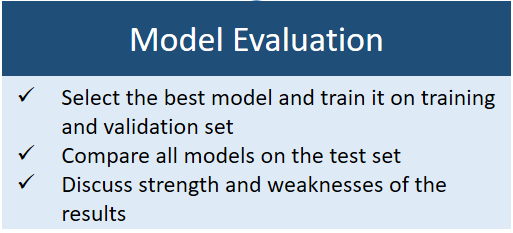

Make a prediction on the test set and calculate the residuals. Depending on the variables You used in Your model, You migth have to change the DataFrame `X` to hold the same predictors. 

In [86]:
# No we work on the unseen test data
X = test[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'isAdelie',	'fromTorgersen',	'fromBiscoe',	'isFemale']]
y = test[["body_mass_g"]]

# We still use the same model on this other data
test["Predicted_body_mass_g"] = f.predict(X)
test

test["Residuals"] = test["body_mass_g"] - test["Predicted_body_mass_g"]
test

<ipython-input-86-e386737bf3cd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predicted_body_mass_g"] = f.predict(X)
<ipython-input-86-e386737bf3cd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Residuals"] = test["body_mass_g"] - test["Predicted_body_mass_g"]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,isAdelie,isGentoo,fromTorgersen,fromBiscoe,isFemale,Predicted_body_mass_g,Residuals
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,Male,False,False,False,False,False,4112.864431,-387.864431
272,Gentoo,Biscoe,45.1,14.4,210.0,4400.0,Female,False,True,False,True,True,4562.588616,-162.588616
108,Adelie,Biscoe,38.1,17.0,181.0,3175.0,Female,True,False,False,True,True,3455.068165,-280.068165
165,Chinstrap,Dream,52.0,18.1,201.0,4050.0,Male,False,False,False,False,False,4312.694408,-262.694408
240,Gentoo,Biscoe,50.2,14.3,218.0,5700.0,Male,False,True,False,True,False,5344.217200,355.782800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Adelie,Dream,41.1,19.0,182.0,3425.0,Male,True,False,False,False,False,3583.975717,-158.975717
190,Chinstrap,Dream,46.9,16.6,192.0,2700.0,Female,False,False,False,False,True,3566.637705,-866.637705
287,Gentoo,Biscoe,49.5,16.2,229.0,5800.0,Male,False,True,False,True,False,5619.664497,180.335503
294,Gentoo,Biscoe,46.4,15.0,216.0,4700.0,Female,False,True,False,True,True,4740.744144,-40.744144


##### ✍️ Calculate the MSE

If everything worked as planned, we expact to see a prediction error on the test set that is slightly higher than the the error on the training set:

In [87]:
# On average we miss the weight by 360g in the training set. This is more than on the test set, so we must not be afraid of overfitting.
test["SquaredError"] = (test["Residuals"])**2

test["SquaredError"].mean()

np.sqrt(test["SquaredError"].mean())

<ipython-input-87-c3030efe1d67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["SquaredError"] = (test["Residuals"])**2


360.8890178547198

#### Check Residuals

<AxesSubplot:xlabel='Residuals', ylabel='Count'>

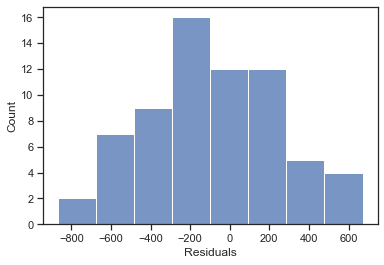

In [88]:
sns.histplot(data=test, x="Residuals")

<AxesSubplot:xlabel='species', ylabel='Residuals'>

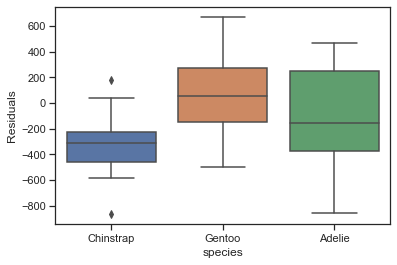

In [89]:
sns.boxplot(data=test, y="Residuals",x ="species")
# The systematic error (bias) is slightly larger, but still not significant
# The prediction would profit from a more flexibel model

While the model is good for the prediction, it ha so many parameter, that it gets hard to interpret;

In [91]:
import statsmodels.formula.api as smf

model = smf.ols('body_mass_g ~ bill_length_mm +bill_depth_mm + flipper_length_mm + isAdelie + fromTorgersen + fromBiscoe + isFemale + 1', data = train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     192.4
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           1.55e-98
Time:                        15:07:36   Log-Likelihood:                -1906.8
No. Observations:                 266   AIC:                             3830.
Df Residuals:                     258   BIC:                             3858.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1787.53

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## 🤓 Summary: Using all the Infomation

We can try to integrate the information on the Gentoo species again. We see, that both the training and test error improve. So in practice the high VIF does not cause any problems.

However, we still see an systematic bias in the residuals for the different species. The model is still not powerful / flexibile enough to make use of all the information available.

In [103]:
# Importing scikit-learn package
from sklearn.linear_model import LinearRegression

train, test = train_test_split(penguins_cleaned, test_size=0.2, random_state=11)

# Defining the predicted variable y and predictor X
X = train[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'isAdelie', 'isGentoo','fromTorgersen',	'fromBiscoe',	'isFemale']]
y = train[["body_mass_g"]]

# Define, that we want to take a linear regression as a model f
f = LinearRegression()

# Fitting Simple Linear Regression to the test set
f.fit(X, y)

train["Predicted_body_mass_g"] = f.predict(X)
train

train["Residuals"] = train["body_mass_g"] - train["Predicted_body_mass_g"]
train

train["SquaredError"] = (train["Residuals"])**2

train["SquaredError"].mean()

np.sqrt(train["SquaredError"].mean())

<ipython-input-103-190f146c7a2f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Predicted_body_mass_g"] = f.predict(X)
<ipython-input-103-190f146c7a2f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Residuals"] = train["body_mass_g"] - train["Predicted_body_mass_g"]
<ipython-input-103-190f146c7a2f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

282.5619719614671

In [104]:
X = test[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'isAdelie', 'isGentoo','fromTorgersen',	'fromBiscoe',	'isFemale']]
y = test[["body_mass_g"]]

test["Predicted_body_mass_g"] = f.predict(X)
test

test["Residuals"] = test["body_mass_g"] - test["Predicted_body_mass_g"]
test

test["SquaredError"] = (test["Residuals"])**2

test["SquaredError"].mean()

np.sqrt(test["SquaredError"].mean())

<ipython-input-104-954ace462016>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predicted_body_mass_g"] = f.predict(X)
<ipython-input-104-954ace462016>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Residuals"] = test["body_mass_g"] - test["Predicted_body_mass_g"]
<ipython-input-104-954ace462016>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

297.51156458585154

<AxesSubplot:xlabel='species', ylabel='Residuals'>

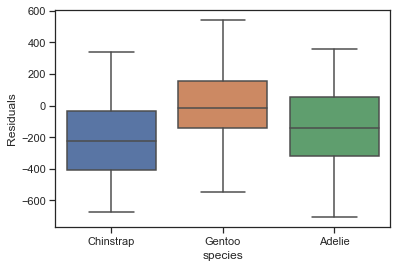

In [105]:
sns.boxplot(data=test, y="Residuals",x ="species")
# We still seem to make a systematic error for the species

<AxesSubplot:xlabel='species', ylabel='Residuals'>

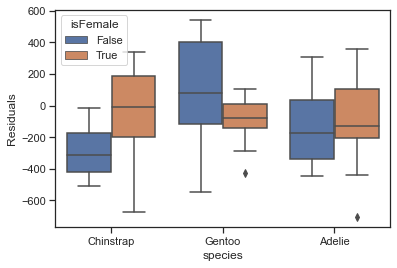

In [106]:
sns.boxplot(data=test, y="Residuals",x ="species", hue= "isFemale")
# We still seem to make a systematic error for the species

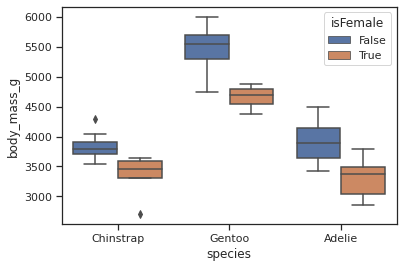

In [ ]:
sns.boxplot(data=test, y="body_mass_g",x ="species", hue= "isFemale")
# We still seem to make a systematic error for the species

We see, that we still have some systematic errors in our model (different residuals for different genders). We could try to fix this by adding an interaction term for the species and gender, as the gender difference in weigth is different in different species (see above). In short, a more flexible model might be useful.

We also see, that a a priori selection of the variables must not lead to the best results. Therefore, we do not only need more flexible models, but better ways for variable selection.